In [17]:
import pandas as pd
import math
import ast

In [18]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:

# 파일 경로
file_path = '/content/drive/My Drive/Colab Notebooks/CJ_Hackathon/Data/'

#로드
df = pd.read_csv(file_path + '(test)perfume_data_combined.csv')


In [20]:
df.columns

Index(['name', 'company', 'image', 'for_gender', 'rating', 'number_votes',
       'main accords', 'description', 'top notes', 'middle notes',
       'base notes', 'longevity', 'sillage', 'gender_vote', 'price value'],
      dtype='object')

In [21]:
df = df[['name','main accords', 'description', 'top notes', 'middle notes','base notes']]

In [22]:
df.head()

,name,main accords,description,top notes,middle notes,base notes
0,Angels' Share,"{'woody': 100.0, 'sweet': 92.6987, 'warm spicy...",Angels' Share by By Kilian is a Oriental Vanil...,['Cognac'],"['Cinnamon', 'Tonka Bean', 'Oak']","['Praline', 'Vanilla', 'Sandalwood']"
1,My Way,"{'white floral': 100.0, 'citrus': 60.4322, 'tu...",My Way by Giorgio Armani is a Floral fragrance...,"['Orange Blossom', 'Bergamot']","['Tuberose', 'Indian Jasmine']","['White Musk', 'Madagascar Vanilla', 'Virginia..."
2,Libre Intense,"{'vanilla': 100.0, 'aromatic': 71.4216, 'sweet...",Libre Intense by Yves Saint Laurent is a Orien...,"['Lavender', 'Mandarin Orange', 'Bergamot']","['Lavender', 'Tunisian Orange Blossom', 'Jasmi...","['Madagascar Vanilla', 'Tonka Bean', 'Ambergri..."
3,Dior Homme 2020,"{'woody': 100.0, 'musky': 72.7229, 'amber': 53...",Dior Homme 2020 by Christian Dior is a Woody f...,"['Bergamot', 'Pink Pepper', 'elemi']","['Cashmere Wood', 'Atlas Cedar', 'Patchouli']","['Iso E Super', 'Haitian Vetiver', 'White Musk']"
4,Acqua di Giò Profondo,"{'aromatic': 100.0, 'marine': 93.2493, 'citrus...",Acqua di Giò Profondo by Giorgio Armani is a A...,"['Sea Notes', 'Aquozone', 'Bergamot', 'Green M...","['Rosemary', 'Cypress', 'Lavender', 'Mastic or...","['Mineral notes', 'Musk', 'Patchouli', 'Amber']"


'description' 컬럼 전처리

In [23]:
#불필요 단어 제거
df['description'] = df['description'].str.replace('Read about this perfume.*', '', regex=True)

df['description'][0]

<ipython-input-23-a8de1df2d078>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].str.replace('Read about this perfume.*', '', regex=True)


"Angels' Share by By Kilian is a Oriental Vanilla fragrance for women and men. This is a new fragrance. Angels' Share was launched in 2020. The nose behind this fragrance is Benoist Lapouza. Top note is Cognac; middle notes are Cinnamon, Tonka Bean and Oak; base notes are Praline, Vanilla and Sandalwood.  "

'main accords'컬럼 전처리

In [24]:
def process_accords(accords):
    # 딕셔너리로 변환
    accords_dict = ast.literal_eval(accords)


    result = []

    # 값에 30을 나누고 반올림
    for key, value in accords_dict.items():

        repeat_count = round(value / 30)

        # 반올림한 횟수만큼 키를 반복하여 결과 리스트에 추가
        result.extend([key] * repeat_count)

    return result

# 함수적용
df['main accords'] = df['main accords'].apply(process_accords)

df.head()

<ipython-input-24-6ccd211909e5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main accords'] = df['main accords'].apply(process_accords)


,name,main accords,description,top notes,middle notes,base notes
0,Angels' Share,"[woody, woody, woody, sweet, sweet, sweet, war...",Angels' Share by By Kilian is a Oriental Vanil...,['Cognac'],"['Cinnamon', 'Tonka Bean', 'Oak']","['Praline', 'Vanilla', 'Sandalwood']"
1,My Way,"[white floral, white floral, white floral, cit...",My Way by Giorgio Armani is a Floral fragrance...,"['Orange Blossom', 'Bergamot']","['Tuberose', 'Indian Jasmine']","['White Musk', 'Madagascar Vanilla', 'Virginia..."
2,Libre Intense,"[vanilla, vanilla, vanilla, aromatic, aromatic...",Libre Intense by Yves Saint Laurent is a Orien...,"['Lavender', 'Mandarin Orange', 'Bergamot']","['Lavender', 'Tunisian Orange Blossom', 'Jasmi...","['Madagascar Vanilla', 'Tonka Bean', 'Ambergri..."
3,Dior Homme 2020,"[woody, woody, woody, musky, musky, amber, amb...",Dior Homme 2020 by Christian Dior is a Woody f...,"['Bergamot', 'Pink Pepper', 'elemi']","['Cashmere Wood', 'Atlas Cedar', 'Patchouli']","['Iso E Super', 'Haitian Vetiver', 'White Musk']"
4,Acqua di Giò Profondo,"[aromatic, aromatic, aromatic, marine, marine,...",Acqua di Giò Profondo by Giorgio Armani is a A...,"['Sea Notes', 'Aquozone', 'Bergamot', 'Green M...","['Rosemary', 'Cypress', 'Lavender', 'Mastic or...","['Mineral notes', 'Musk', 'Patchouli', 'Amber']"


## BERT 모델을 통한 Tokenization 및 Imbedding

In [25]:
pip install transformers

In [30]:
from transformers import BertTokenizer, BertModel
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F

In [27]:
#버전확인
import torch
print(torch.__version__)


2.1.0+cu118


In [32]:
# GPU가 사용 가능한지 확인
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [28]:
# BERT 모델과 토큰화기 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


In [33]:
# 모든 컬럼의 내용 통합
df['text'] = df['name'] + ' ' + df['main accords'].astype(str) + ' ' + df['description'] + ' ' + df['top notes'] + ' ' + df['middle notes'] + ' ' + df['base notes']

# 새로운 데이터프레임 생성
new_df = pd.DataFrame()
new_df['name'] = df['name']

# 텍스트를 토큰화 및 임베딩
embeddings = []
for text in tqdm(df['text'], desc="Processing texts"):
    # 텍스트를 토큰화 및 토큰이 512개를 초과하므로 분할
    tokens = tokenizer.tokenize(text)
    token_chunks = [tokens[i:i + 512] for i in range(0, len(tokens), 512)]

    chunk_embeddings = []
    for token_chunk in token_chunks:
        # 각 부분을 모델에 입력
        inputs = tokenizer.convert_tokens_to_ids(token_chunk)
        inputs = torch.tensor([inputs])

        # 토큰 수가 512가 되도록 패딩
        inputs = F.pad(inputs, (0, 512 - inputs.size(1)), value=0)

        outputs = model(inputs)

        # 각 부분의 임베딩을 저장
        chunk_embeddings.append(outputs.last_hidden_state.mean(dim=1).detach().numpy())

    # 모든 부분의 임베딩을 평균하여 하나의 임베딩 생성
    embeddings.append(np.mean(chunk_embeddings, axis=0))

Processing texts: 100%|██████████| 478/478 [16:21<00:00,  2.05s/it]




## K-means Clustering
군집화를 위해 최적의 K값을 확인 후 분류한다

### *Silhouette Analysis* 를 통한 최적의 K값 확인

분석을 위해 차원 축소

In [ ]:
# 각 향수의 임베딩 벡터들의 평균 구하기
average_embeddings = [np.mean(embedding, axis=0) for embedding in embeddings]

# numpy 배열로 변환
X = np.array(average_embeddings)

#2차원
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

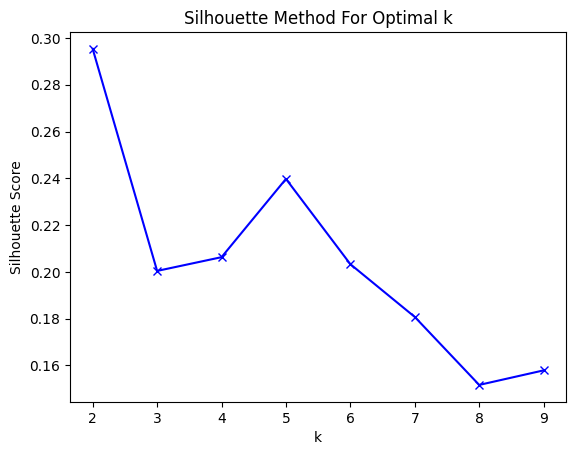

In [42]:
from sklearn.metrics import silhouette_score

sil = []


K = range(2,10)


for k in K:
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()


최적의 K는 5임을 볼 수 있으므로 k=5로 설정한다

In [44]:
from sklearn.cluster import KMeans

# KMeans 객체 생성. 클러스터의 수는 5
kmeans = KMeans(n_clusters=5)

# K-means 클러스터링 수행
kmeans.fit(X)

# 클러스터 레이블 얻기
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
# 'Cluster'라는 이름의 새로운 열을 생성하고, 클러스터 레이블을 저장
df['Cluster'] = labels


print(df['Cluster'].unique())


[0. 1. 3. 2. 4.]


In [65]:
df_visualisation = df[['name','Cluster']]

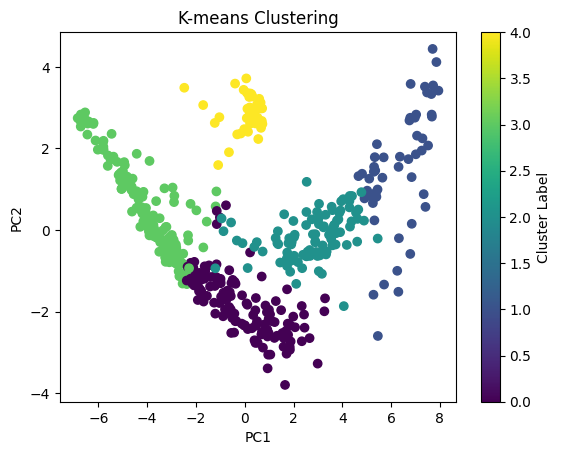

In [71]:
import matplotlib.pyplot as plt



# 산점도 그리기
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')

# 제목 및 x,y축 설정
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.colorbar(label='Cluster Label')  # 색상에 따른 클러스터 라벨 설정


plt.show()

In [75]:
#같은 cluster 값끼리 볼 수 있도록 정렬
df_sorted = df.sort_values(by='Cluster')

In [76]:
df_sorted.to_csv('Test_result_clustering')

In [77]:
df_sorted.head()

,name,main accords,description,top notes,middle notes,base notes,text,Cluster
0,Angels' Share,"[woody, woody, woody, sweet, sweet, sweet, war...",Angels' Share by By Kilian is a Oriental Vanil...,['Cognac'],"['Cinnamon', 'Tonka Bean', 'Oak']","['Praline', 'Vanilla', 'Sandalwood']","Angels' Share ['woody', 'woody', 'woody', 'swe...",0.0
93,Black Phantom,"[sweet, sweet, sweet, warm spicy, warm spicy, ...",Black Phantom by By Kilian is a Oriental Vanil...,[],"['Dark Chocolate', 'Rum', 'Caramel', 'Coffee',...",[],"Black Phantom ['sweet', 'sweet', 'sweet', 'war...",0.0
293,Narciso Rodriguez For Her,"[musky, musky, musky, powdery, powdery, white ...",Narciso Rodriguez For Her by Narciso Rodriguez...,"['African Orange flower', 'Osmanthus', 'Bergam...","['Musk', 'Amber']","['Vetiver', 'Vanille', 'Patchouli']","Narciso Rodriguez For Her ['musky', 'musky', '...",0.0
95,Light Blue Eau Intense Pour Homme,"[aromatic, aromatic, aromatic, citrus, citrus,...",Light Blue Eau Intense Pour Homme by Dolce&Gab...,"['Grapefruit', 'Mandarin Orange']","['Sea water', 'Juniper']","['Amberwood', 'Musk']","Light Blue Eau Intense Pour Homme ['aromatic',...",0.0
97,Fucking Fabulous,"[aromatic, aromatic, aromatic, vanilla, vanill...",Fucking Fabulous by Tom Ford is a Leather frag...,"['Clary Sage', 'Lavender']","['Bitter Almond', 'Leather', 'Vanilla', 'Orris']","['Leather', 'Tonka Bean', 'Cashmeran', 'White ...","Fucking Fabulous ['aromatic', 'aromatic', 'aro...",0.0
